# A deep learning approach to observe the behaviour of employees towards punctuality at work

In this project we will implement three different classification algorithms from scratch. i.e. we implement all the mathematics invovled in these algorithms.  
    - Logistic Regression
    - Neural Network (One hidden layer)
    - Deep Learning Neural Network (At least two hidden layers)
   
At the end of the project, we compare the performance of three different models and will use different optimization techniques to further improve the performance. 

We will also implement the Deep Learning Neural Network in Tensorflow, as Tensorflow is one of the most widely used deep learning framework. 

We will also use these models implemented in library sklearn and compare the performance of our implementation from scratch to these buildin functions. 

After the implementation of algorithms along with different optimization techniques, we will further analyze our data and will understand different features and see what are the most important features that is effecting employees to have excessive number of hours absent from work and how we can build a model to reduce its impact. 


## 1 - Packages ##

First, let's run the cell below to import all the packages that you will need during this assignment. 
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.
- [data_utils] has different functions to load data, analyze data and different other visualization functions. 

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import math
import pandas as pd
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

import sklearn
import sklearn.linear_model
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn_utils import *

## 2 - Analysis of Dataset ##

Let's get more familiar with the dataset. 

We will load 60% data to train, 20% data to dev/validation and 20% data to test. In the implementation dev and validation are used interchangeably and both mean the same set. We also bring the matrix into the order to be processed by our algorithm. For example in the original data, we have all features in different columns and the last column is the result. In the rearrangement we bring all the features to a single column, so that we have all the features of the first training example in the first column, all the features of the second training example in the seond column and so on. The result is stored in a horizantal vector, where each column represent the result of the training samples.

One common preprocessing step in machine learning is to center and standardize your dataset, meaning that we substract the mean of the whole numpy array from each example, and then divide each example by the standard deviation of the whole numpy array. During the training of your model, you're going to multiply weights and add biases to some initial inputs in order to observe neuron activations. Then you backpropogate with the gradients to train the model. But, it is extremely important for each feature to have a similar range such that our gradients don't explode. Let's standardize our dataset.

<font color='blue'>
**What you need to remember:**

Common steps for pre-processing a new dataset are:
- Figure out the dimensions and shapes of the problem (m_train, m_test, n_features, ...)
- Reshape the datasets such that each example is now a vector of size (n_features, 1)
- We place all vectora of examples and stack them vertical into a single matrix
- "Standardize" the data
</font>

In [34]:
file = 'dataset/Absenteeism_at_work.csv'

# Load the dataset as DataFrame in Pandas and then convert to matrix
#data = load_dataset(file)
df = pd.read_csv(file)
print('Shape of dataset is:{}'.format(df.shape))
print('Type of features is:\n{}'.format(df.dtypes))

Shape of dataset is:(740, 20)
Type of features is:
Reason for absence                 int64
Month of absence                   int64
Day of the week                    int64
Seasons                            int64
Transportation expense             int64
Distance from Residence to Work    int64
Service time                       int64
Age                                int64
Work load Average/day              int64
Hit target                         int64
Disciplinary failure               int64
Education                          int64
Son                                int64
Social drinker                     int64
Social smoker                      int64
Pet                                int64
Weight                             int64
Height                             int64
Body mass index                    int64
Absenteeism category               int64
dtype: object


our data is not balanced. To bring it into balanced, we should use SMOTE


In [35]:
col = 'Absenteeism category'
data = sample_data(df, col)


Shape of X: (740, 19)
Shape of y: (740, 1)
Before OverSampling, counts of label '1': [272]
Before OverSampling, counts of label '0': [468] 

After OverSampling, the shape of X: (936, 19)
After OverSampling, the shape of y: (936, 1) 

After OverSampling, counts of label '1': [468]
After OverSampling, counts of label '0': [468]
Size of the whole data after over sampling (936, 20)


In [36]:
# Randomly distribute data into training, testing and validation classes. We use 60-20-20 distribution
un_training_x, training_y, un_testing_x, testing_y, un_validation_x, validation_y = split_random(data, percent_train=60, percent_test=20)

# Lets normalize our X data
training_x, testing_x, validation_x = normalize_data(un_training_x, un_testing_x, un_validation_x)

# We can print the X data, to be sure that we have the normalized data in the range of -1 to 1
print("X:")
print_normalized_data(training_x, testing_x, validation_x)
print("__________________________________")


# Lets print the Y class, to be sure that we have a mix of positive and negative class
print("Y")
print_normalized_data(training_y, testing_y, validation_y)
print("__________________________________")

percent_train 60
percent_test 20
percent_validation 20
Number of training examples: m_train = 561
Number of testing examples: m_test = 187
Number of validation examples: m_validation = 188
Number of features: n_features = 19
training_x shape (19, 561)
training_y shape (1, 561)
testing_x shape (19, 187)
testing_y shape (1, 187)
validation_x shape (19, 188)
validation_y shape (1, 188)
Original Data:
[[  9.           9.           2.25043714 ... 170.          23.
    1.        ]
 [ 23.           5.           4.         ... 196.          25.
    0.        ]
 [ 23.           3.           2.         ... 165.          32.
    0.        ]
 ...
 [ 22.           3.           2.         ... 172.          29.
    1.        ]
 [ 22.53238491   9.           4.59715472 ... 171.46761509  22.74092074
    1.        ]
 [ 20.09643515   3.           2.         ... 169.46191354  25.1928703
    1.        ]]
____________________________________________________________
X:
Training:

[[0.00085877 0.00219464 0.002

## 3 - Logistic Regression ##

Train accuracy:  50.623885918003566
Dev accuracy:  50.0
Test accuracy:  48.12834224598931
Confusion matrix of Testing Data:
[[ 0 97]
 [ 0 90]]


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


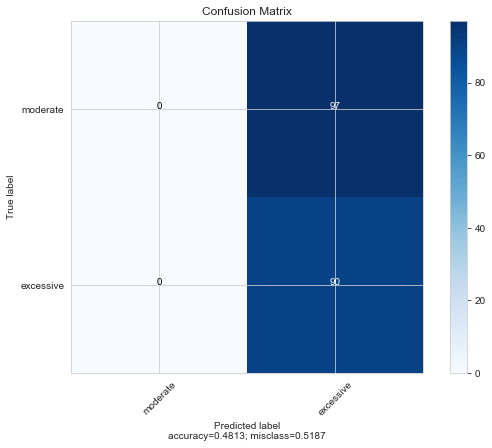

Classification Report:
             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00        97
        1.0       0.48      1.00      0.65        90

avg / total       0.23      0.48      0.31       187

Precision score: 0.23163373273470786
Recall score: 0.48128342245989303
F1 Score: 0.31274735033494855
Logistic Regression


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


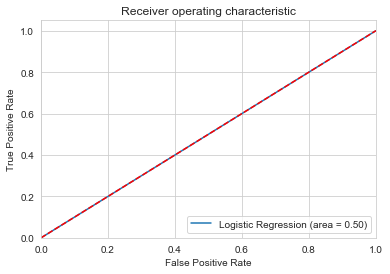

In [37]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(Cs=1, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=1000,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.001,
           verbose=1.0)
clf.fit(training_x.T, training_y.T.reshape(training_x.shape[1],))
acc_dic = {}
acc_dic = analyze_results(training_x, training_y, validation_x, validation_y, testing_x, testing_y, "lr_sklearn", None, clf, acc_dic)

In [38]:
# plot the cost
#plt.plot(clf.loss_curve_)
#plt.ylabel('cost')
#plt.xlabel('iterations (per tens)')
#plt.title("Learning rate =" + str(0.01))
#plt.show()

## 4 - Classification of data with one hidden layer Neural Network ##

Train accuracy:  61.853832442067734
Dev accuracy:  66.48936170212767
Test accuracy:  65.77540106951872
Confusion matrix of Testing Data:
[[43 54]
 [10 80]]


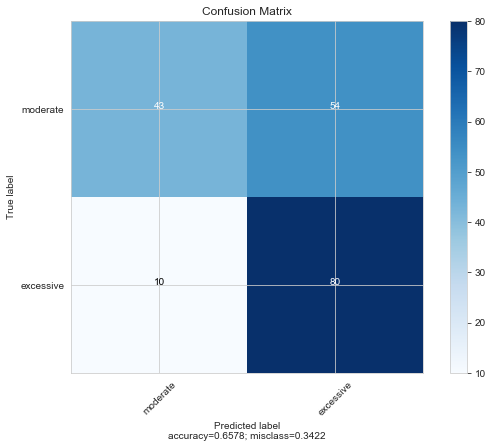

Classification Report:
             precision    recall  f1-score   support

        0.0       0.81      0.44      0.57        97
        1.0       0.60      0.89      0.71        90

avg / total       0.71      0.66      0.64       187

Precision score: 0.7081789117172688
Recall score: 0.6577540106951871
F1 Score: 0.6411713776419657
Shallow Neural Network


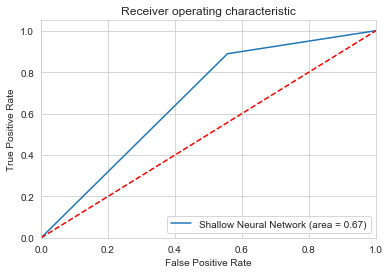

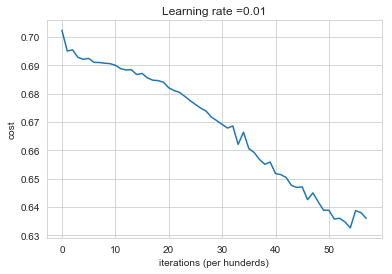

In [39]:
from sklearn.neural_network import MLPClassifier
lr=0.01
clf = MLPClassifier(activation='tanh', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[100], learning_rate='adaptive',
       learning_rate_init=lr, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=40, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.0, verbose=False,
       warm_start=False)
    
n_features = training_x.T.shape[0]
clf.fit(training_x.T, training_y.T.reshape(n_features,))

pred = clf.predict(testing_x.T)
#print([pred])
acc_dic = analyze_results(training_x, training_y, validation_x, validation_y, testing_x, testing_y, "nn_sklearn", None, clf, acc_dic)

# plot the cost
plt.plot(clf.loss_curve_)
plt.ylabel('cost')
plt.xlabel('iterations (per hunderds)')
plt.title("Learning rate =" + str(lr))
plt.show()

In [40]:
print(clf.coefs_[0].shape)
w = clf.coefs_[0]
w = np.average(w, axis=1)
w = w.ravel()
print(w.shape)
print(w)

(19, 100)
(19,)
[-0.01184889  0.01299534 -0.02475694 -0.00564392  0.01845623 -0.0066884
  0.01159283 -0.00784701  0.01389525  0.00180973  0.00357736  0.0091553
  0.00823454  0.03075042  0.00083464  0.01668986  0.00935504  0.00139846
  0.00684857]


(19,)
[ 0.          8.92576775  0.          0.         12.67654041  0.
  7.96246095  0.          9.54385925  1.24300063  2.45708333  6.28826051
  5.65583809 21.12072319  0.57327025 11.46332439  6.4254506   0.96052644
  4.70389421]
Type of features is:
Reason for absence                 int64
Month of absence                   int64
Day of the week                    int64
Seasons                            int64
Transportation expense             int64
Distance from Residence to Work    int64
Service time                       int64
Age                                int64
Work load Average/day              int64
Hit target                         int64
Disciplinary failure               int64
Education                          int64
Son                                int64
Social drinker                     int64
Social smoker                      int64
Pet                                int64
Weight                             int64
Height                             int64
Body mass 

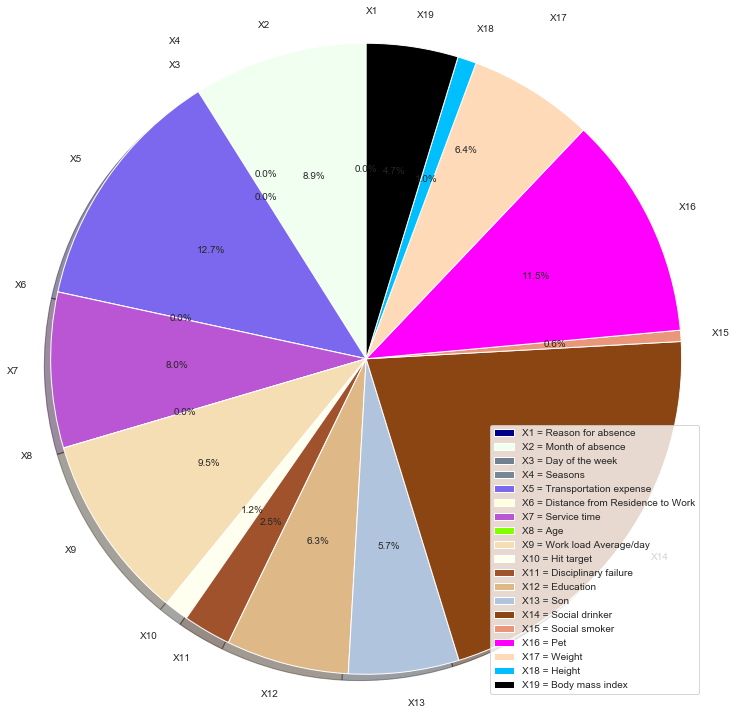

In [41]:

import collections
from collections import Counter
def fixOverLappingText(text):

    # if undetected overlaps reduce sigFigures to 1
    sigFigures = 2
    positions = [(round(item.get_position()[1],sigFigures), item) for item in text]

    overLapping = Counter((item[0] for item in positions))
    overLapping = [key for key, value in overLapping.items() if value >= 2]

    for key in overLapping:
        textObjects = [text for position, text in positions if position == key]

        if textObjects:

            # If bigger font size scale will need increasing
            scale = 0.05

            spacings = np.linspace(0,scale*len(textObjects),len(textObjects))

            for shift, textObject in zip(spacings,textObjects):
                textObject.set_y(key + shift)




w[w<0] = 0
#print(w)
w = w * 1000
#print(w)
dt = df.dtypes
s = np.sum(w)
avg = (w / s ) * 100
cs = np.sum(avg)
#print(cs)
print(avg.shape)
print(avg)
print('Type of features is:\n{}'.format(df.dtypes))

keys = []
df_dic = df.dtypes.to_dict()
i = 1
for key, value in df_dic.items() :
    keys.append('X'+str(i)+' = ' + key)
    i = i + 1
    #print (key, value)
keys.pop()
print(keys)

import matplotlib.colors as pltc
from random import sample

labels = []
for i in range(1, 20):
        l = 'X'+str(i)
        labels.append(l)
print(labels)


all_colors = [k for k,v in pltc.cnames.items()]

colors = sample(all_colors, len(avg))
plt.figure(figsize=(10,10))


    
sizes = avg
#colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
patches, texts, junk= plt.pie(sizes, colors=colors, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90)
fixOverLappingText(texts)
fixOverLappingText(junk)
plt.legend(patches, keys, loc='best')
plt.axis('equal')
plt.tight_layout()
plt.savefig('./results/contr_snn.pdf')
plt.show()

In [42]:
print(clf.coefs_[0].shape)
w = clf.coefs_[0]
w = np.average(w, axis=1)
w = w.ravel()
print(w.shape)
print(w)

#w[w<0] = 0
#print(w)
w = w * 1000
print(w)
dt = df.dtypes
s = np.sum(w)
avg = (w / s ) * 100
cs = np.sum(avg)
#print(cs)
print(avg.shape)
print(avg)

(19, 100)
(19,)
[-0.01184889  0.01299534 -0.02475694 -0.00564392  0.01845623 -0.0066884
  0.01159283 -0.00784701  0.01389525  0.00180973  0.00357736  0.0091553
  0.00823454  0.03075042  0.00083464  0.01668986  0.00935504  0.00139846
  0.00684857]
[-11.84889233  12.99534499 -24.75694419  -5.64392395  18.45622927
  -6.68840055  11.59283211  -7.8470127   13.89524654   1.80972914
   3.57735563   9.15530373   8.23453727  30.75041745   0.83464469
  16.68986461   9.3550437    1.39846485   6.84856808]
(19,)
[-13.34208388  14.63301193 -27.87680205  -6.35516845  20.78207415
  -7.53126948  13.05375508  -8.83588936  15.64631864   2.03779031
   4.02817222  10.30905057   9.27224958  34.62556984   0.9398262
  18.79311308  10.53396167   1.5746987    7.71162124]


<BarContainer object of 19 artists>

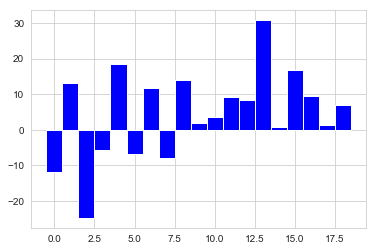

In [43]:
x = range(19)
fig = plt.figure()
ax = plt.subplot(111)
ax.bar(x, w, width=1, color='b')

<BarContainer object of 19 artists>

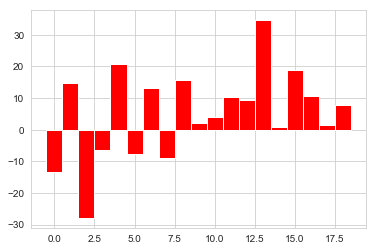

In [44]:
x = range(19)
fig = plt.figure()
ax = plt.subplot(111)
ax.bar(x, avg, width=1, color='r')

## 5 - A Deep Neural Network Model ##


Train accuracy:  78.25311942959001
Dev accuracy:  59.57446808510639
Test accuracy:  64.70588235294117
Confusion matrix of Testing Data:
[[94  3]
 [63 27]]


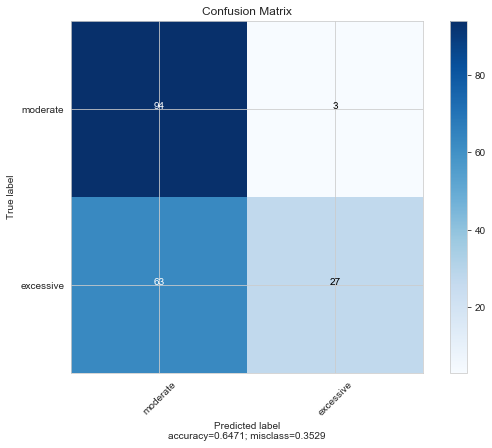

Classification Report:
             precision    recall  f1-score   support

        0.0       0.60      0.97      0.74        97
        1.0       0.90      0.30      0.45        90

avg / total       0.74      0.65      0.60       187

Precision score: 0.7437242412888723
Recall score: 0.6470588235294118
F1 Score: 0.6005094951366374
Deep Neural Network


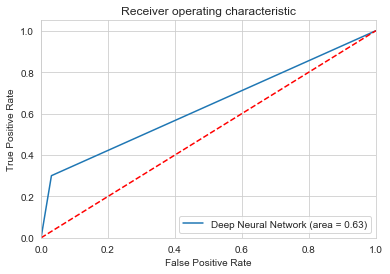

In [45]:
from sklearn.neural_network import MLPClassifier
lr = 0.001
clf = MLPClassifier(hidden_layer_sizes = [200, 100, 50, 10, 5], activation='relu', 
                    alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       learning_rate='adaptive',
       learning_rate_init=lr, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=40, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.0, verbose=False,
       warm_start=False)
clf.fit(training_x.T, training_y.T.ravel())


acc_dic = analyze_results(training_x, training_y, validation_x, validation_y, testing_x, testing_y, "dnn_sklearn", None, clf, acc_dic)



In [46]:
#print("weights between input and first hidden layer:")
print(clf.coefs_[0])
w = clf.coefs_[0]
w = np.average(w, axis=1)
w = w.ravel()
print(w.shape)
print(w)



[[-0.0298273  -0.14366595  0.09322868 ... -0.08262141 -0.07873463
   0.1019248 ]
 [-0.15844017 -0.08922485 -0.03398163 ... -0.14607712 -0.12485852
   0.06956917]
 [-0.09001017 -0.0568131  -0.1223924  ... -0.07349769  0.13024133
   0.16601289]
 ...
 [-0.07317557 -0.07456049 -0.11905853 ...  0.15374717 -0.0528608
   0.01244878]
 [-0.00048192 -0.10904687  0.06493365 ... -0.02517618  0.15138669
   0.11616047]
 [ 0.132552   -0.07959219 -0.0334348  ... -0.05969304 -0.07614222
   0.00652149]]
(19,)
[-0.00633096 -0.01087906  0.00487924  0.00867898  0.00981365  0.00620947
  0.00695238  0.00418947  0.01037164 -0.00122349 -0.01817118  0.00512744
  0.00119541 -0.00076716  0.01028583  0.00627486 -0.0025681  -0.00092831
  0.00546515]


[-0.00633096 -0.01087906  0.00487924  0.00867898  0.00981365  0.00620947
  0.00695238  0.00418947  0.01037164 -0.00122349 -0.01817118  0.00512744
  0.00119541 -0.00076716  0.01028583  0.00627486 -0.0025681  -0.00092831
  0.00546515]


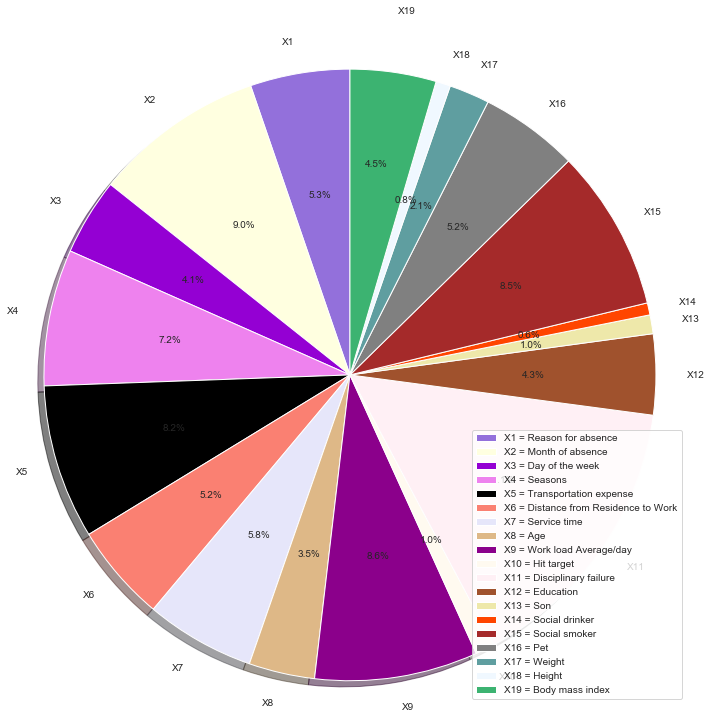

In [47]:



import collections
from collections import Counter
def fixOverLappingText(text):

    # if undetected overlaps reduce sigFigures to 1
    sigFigures = 2
    positions = [(round(item.get_position()[1],sigFigures), item) for item in text]

    overLapping = Counter((item[0] for item in positions))
    overLapping = [key for key, value in overLapping.items() if value >= 2]

    for key in overLapping:
        textObjects = [text for position, text in positions if position == key]

        if textObjects:

            # If bigger font size scale will need increasing
            scale = 0.05

            spacings = np.linspace(0,scale*len(textObjects),len(textObjects))

            for shift, textObject in zip(spacings,textObjects):
                textObject.set_y(key + shift)



import matplotlib.colors as pltc
from random import sample

#w[w>0] = 0
print(w)
w = np.abs(w)
#print(w)
w = w * 1000
dt = df.dtypes
s = np.sum(w)
avg = (w / s ) * 100
#print('Type of features is:\n{}'.format(df.dtypes))

keys = []
df_dic = df.dtypes.to_dict()
i = 1
for key, value in df_dic.items() :
    keys.append('X'+str(i)+' = ' + key)
    i = i + 1
    #print (key, value)
keys.pop()

labels = []
for i in range(1, 22):
        l = 'X'+str(i)
        labels.append(l)

avg1 = []
keys1 = []
labels1 = []
for i in range(len(avg)):
    if avg[i] != 0.0:
        avg1.append(avg[i])
        keys1.append(keys[i])
        labels1.append(labels[i])

all_colors = [k for k,v in pltc.cnames.items()]
colors = sample(all_colors, len(avg))

plt.figure(figsize=(10,10))    
sizes = avg1
patches, texts, junk= plt.pie(sizes, colors=colors, labels=labels1, autopct="%1.1f%%", shadow=True, startangle=90)
fixOverLappingText(texts)
fixOverLappingText(junk)
plt.legend(patches, keys1, loc='best')
plt.axis('equal')
plt.tight_layout()
plt.savefig('./results/contr_dnn.pdf')
plt.show()


In [48]:
# plot the cost
#plt.plot(clf.loss_curve_)
#plt.ylabel('cost')
#plt.xlabel('iterations (per tens)')
#plt.title("Learning rate =" + str(0.01))
#plt.show()

(3, 6)
[[50.62388592 50.         48.12834225  0.23163373  0.48128342  0.31274735]
 [61.85383244 66.4893617  65.77540107  0.70817891  0.65775401  0.64117138]
 [78.25311943 59.57446809 64.70588235  0.74372424  0.64705882  0.6005095 ]]
[[50.62388592 50.         48.12834225]
 [61.85383244 66.4893617  65.77540107]
 [78.25311943 59.57446809 64.70588235]]
[[0.23163373 0.48128342 0.31274735]
 [0.70817891 0.65775401 0.64117138]
 [0.74372424 0.64705882 0.6005095 ]]



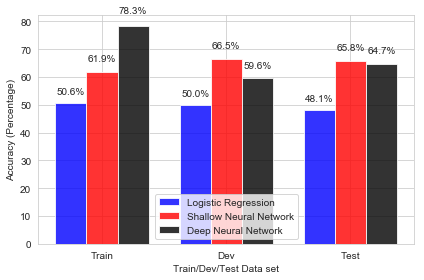

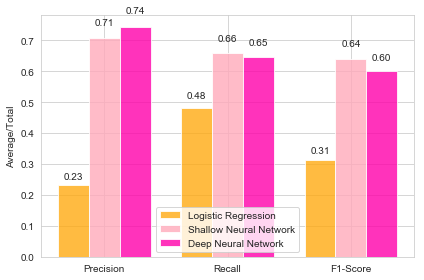

In [49]:
#print(acc_dic)
show_barchart(acc_dic)